In [1]:
# Clear the workspace
rm(list=ls())

In [2]:
# Garbage collect
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,609063,32.6,1319145,70.5,1305150,69.8
Vcells,1138183,8.7,8388608,64.0,1821133,13.9


In [ ]:
# Uncomment and run to install packages if needed
# install.packages("lubridate")
# install.packages("tidyverse")
# install.packages("timetk")
# install.packages("ggridges")

In [3]:
# Load libraries
library(tidyverse)
library(lubridate)
library(timetk)
library(ggridges)

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Temporal Medians Imputation Example

In [ ]:
# Read in a sample file from the intermediate directory (which uses linear interpolation for imputation)
# and then from the processed directory, which uses the temporal medians method for imputation
eng_sample_lin <- read_csv("Data/Intermediate/Highways_England/M1-2633A_Northbound_2019_Intermediate.csv") %>%
    arrange(timestamp)
eng_sample_tms <- read_csv("Data/Processed/Highways_England/M1-2633A_Northbound_2019_Processed.csv") %>%
    arrange(timestamp)

port_sample_lin <- read_csv("Data/Intermediate/Portland/SR 14-102001_Westbound_2019_Intermediate.csv") %>%
    arrange(timestamp)
port_sample_tms <- read_csv("Data/Processed/Portland/SR 14-102001_Westbound_2019_Processed.csv") %>%
    arrange(timestamp)

In [ ]:
# Add variables to store the highway names and sensor numbers (could also parse this from the file names)
england_highway_name = "M1"
england_sensor_name = "2633A"

portland_highway_name = "SR 14"
portland_sensor_name = "102001"

In [ ]:
# Plot the previously computed linear interpolation for the missing values in the sample England data
eng_lin_int <- ggplot(eng_sample_lin[(10000-192):(10000+192), ]) + 
    geom_point(aes(x=timestamp, y=total_volume, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Linear Interpolation Example for {england_highway_name} at Sensor {england_sensor_name}"))

eng_lin_int

In [ ]:
# Plot the temporal medians imputed values for the England data
eng_tme_int <- ggplot(eng_sample_tms[(10000-192):(10000+192), ]) + 
    geom_point(aes(x=timestamp, y=total_volume, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Temporal Medians Interpolation Example for {england_highway_name} at Sensor {england_sensor_name}"))

eng_tme_int

In [ ]:
# Plot the previously computed linear interpolation for the missing values of the Portland sample data
port_lin_int <- ggplot(port_sample_lin[(22439-96):(22439+480), ]) + 
    geom_point(aes(x=timestamp, y=total_volume, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Linear Interpolation Example for {portland_highway_name} at Sensor {portland_sensor_name}"))

port_lin_int

In [ ]:
# Plot the temporal medians imputed values for the Portland data
port_tme_int <- ggplot(port_sample_tms[(22439-96):(22439+480), ]) + 
    geom_point(aes(x=timestamp, y=total_volume, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Temporal Medians Interpolation Example for {portland_highway_name} at Sensor {portland_sensor_name}"))

port_tme_int

In [ ]:
# Save all plots to png files (we assume the Results/EDA directory already exists as it was created in notebook 3)
ggsave("Results/EDA/eng_lin_inter_ex.png", eng_lin_int, width=10, height=5)
ggsave("Results/EDA/eng_tme_inter_ex.png", eng_tme_int, width=10, height=5)
ggsave("Results/EDA/port_lin_inter_ex.png", port_lin_int, width=10, height=5)
ggsave("Results/EDA/port_tme_inter_ex.png", port_tme_int, width=10, height=5)

# LightGBM Plots

## Full Data Set Lag Embeddings

In [4]:
# Read in the csv file of the model performance for the full global LightGBM model with default hyperparameters 
# across various lag embeddings - this file was created in notebook 9.1
lightgbm_lag_df <- read_csv("Results/Global/LightGBM Default/lag_model_performance.csv")

Rows: 21 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): train_rmse, train_mae, train_nrmse, train_smae, val_rmse, val_mae, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


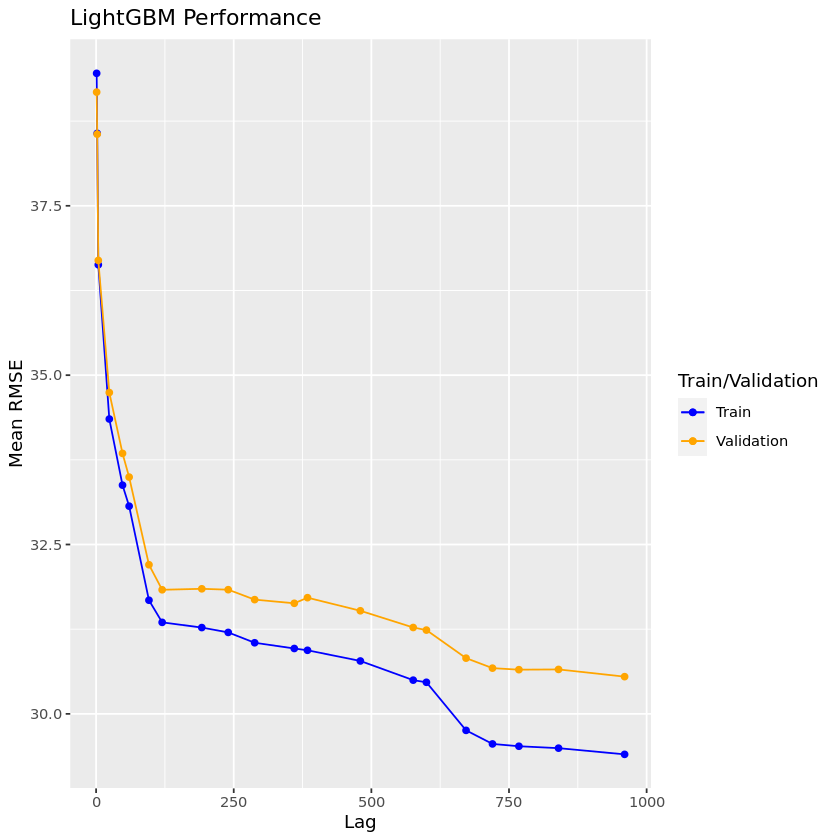

In [6]:
# Plot the mean per time series RMSE on the Training and Validation data vs lag
lightgbm_rmse_plot <- ggplot(lightgbm_lag_df) + 
    geom_point(aes(x=lag, y=train_rmse, col='Train')) +
    geom_line(aes(x=lag, y=train_rmse, col='Train')) +
    geom_point(aes(x=lag, y=val_rmse, col='Validation')) +
    geom_line(aes(x=lag, y=val_rmse, col='Validation')) +
    labs(x="Lag", y="Mean RMSE", title="LightGBM Performance",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

lightgbm_rmse_plot

In [7]:
# Save the plot
ggsave("Results/Global/LightGBM Default/mean_rmse_lag_plot.png", 
       lightgbm_rmse_plot, width=9, height=6)

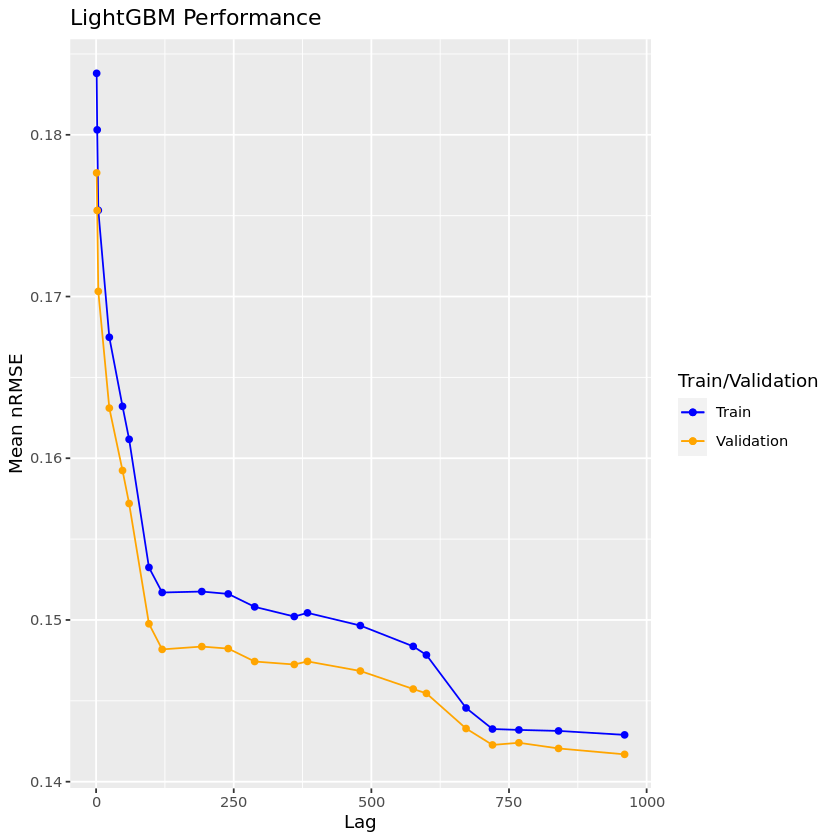

In [8]:
# Plot the mean per time series scaled RMSE on the Training and Validation data vs lag
lightgbm_rmse_scaled_plot <- ggplot(lightgbm_lag_df) + 
    geom_point(aes(x=lag, y=train_nrmse, col='Train')) +
    geom_line(aes(x=lag, y=train_nrmse, col='Train')) +
    geom_point(aes(x=lag, y=val_nrmse, col='Validation')) +
    geom_line(aes(x=lag, y=val_nrmse, col='Validation')) +
    labs(x="Lag", y="Mean nRMSE", title="LightGBM Performance",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

lightgbm_rmse_scaled_plot

In [10]:
# Save the plot
ggsave("Results/Global/LightGBM Default/mean_rmse_scaled_lag_plot.png", 
       lightgbm_rmse_scaled_plot, width=9, height=6)

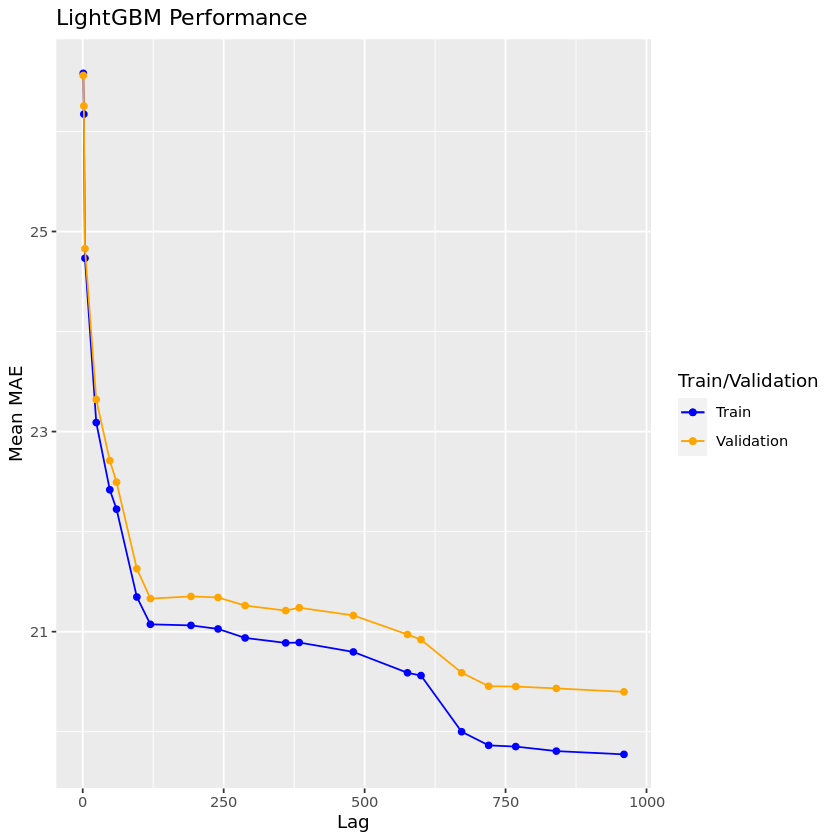

In [11]:
# Plot the mean per time series MAE on the Training and Validation data vs lag
lightgbm_mae_plot <- ggplot(lightgbm_lag_df) + 
    geom_point(aes(x=lag, y=train_mae, col='Train')) +
    geom_line(aes(x=lag, y=train_mae, col='Train')) +
    geom_point(aes(x=lag, y=val_mae, col='Validation')) +
    geom_line(aes(x=lag, y=val_mae, col='Validation')) +
    labs(x="Lag", y="Mean MAE", title="LightGBM Performance",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

lightgbm_mae_plot

In [12]:
# Save the plot
ggsave("Results/Global/LightGBM Default/mean_mae_lag_plot.png", 
       lightgbm_mae_plot, width=9, height=6)

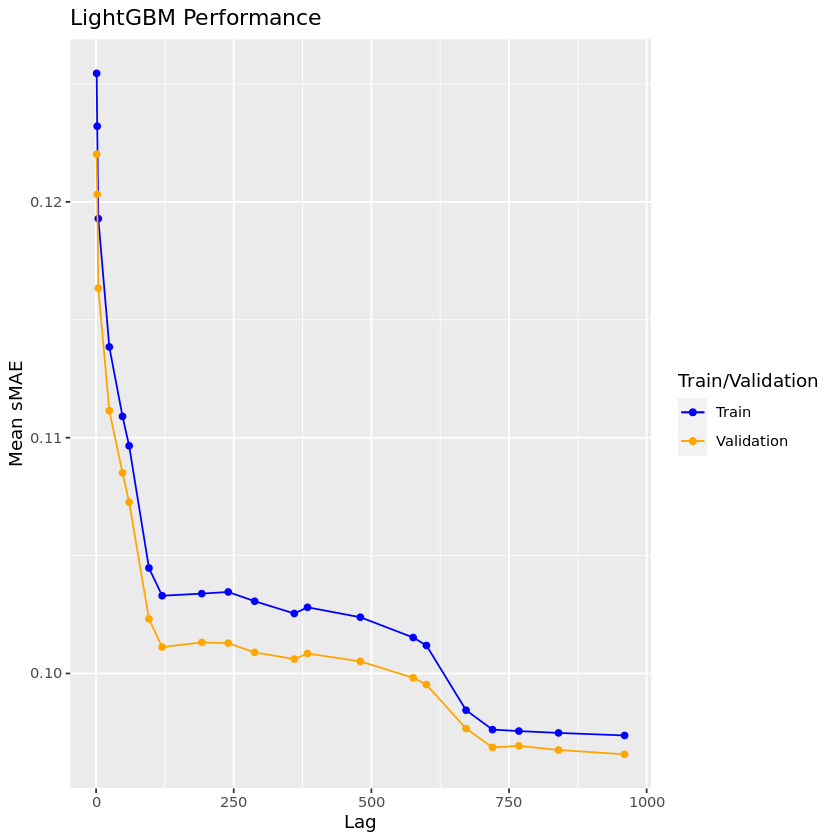

In [13]:
# Plot the mean per time series scaled MAE on the Training and Validation data vs lag
lightgbm_mae_scaled_plot <- ggplot(lightgbm_lag_df) + 
    geom_point(aes(x=lag, y=train_smae, col='Train')) +
    geom_line(aes(x=lag, y=train_smae, col='Train')) +
    geom_point(aes(x=lag, y=val_smae, col='Validation')) +
    geom_line(aes(x=lag, y=val_smae, col='Validation')) +
    labs(x="Lag", y="Mean sMAE", title="LightGBM Performance",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

lightgbm_mae_scaled_plot

In [14]:
# Save the plot
ggsave("Results/Global/LightGBM Default/mean_mae_scaled_lag_plot.png", 
       lightgbm_mae_scaled_plot, width=9, height=6)

# Unseen Sensor EDA

In [ ]:
# Read in all files from the Unseen Sensor - Processed directory 
# and create a list of data frames 
fnames <- list.files("Data/Unseen Sensor/Processed/", pattern="*.csv", full.names=TRUE)
total_df_list <- lapply(fnames, read_csv)

In [ ]:
# Ensure files are in timestamp order
total_df_list <- lapply(total_df_list, function(x) x %>% arrange(timestamp))    

In [ ]:
# Read in the start and end points for each time series from csv
start_end <- read_csv("start_end_points_unseen.csv")
starting_points <- start_end$start
ending_points <- start_end$end

In [ ]:
# For each df in our list, create a row number column called 'rn' - this will allow us to find the starting point
# for each sample using the above starting_points array
total_df_list <- lapply(total_df_list, function(x) x %>% mutate(rn = row_number()))

In [ ]:
# Sample each df in the list according to its corresponding starting and ending point - this creates 12-week
# long samples of each data frame which will be used for modeling and testing
total_df_list_samples <- lapply(1:length(total_df_list), 
                                function(x) total_df_list[[x]] %>% 
                                    filter(rn >= starting_points[x]) %>%
                                    filter(rn <= ending_points[x]))

In [ ]:
# Add a new column to each data frame to denote whether each row should be part of the training set, validation set
# or test set - the first 8 weeks are designated as train, the next 2 as val, and the final 2 as test. It may be 
# the case that train and val get used for training, depending on the modeling task
total_df_list_samples <- lapply(total_df_list_samples, 
                                function(x) x %>% mutate(rn = row_number()) %>%
                                    mutate(train_val_test = ifelse(rn <= (96*7*8), 
                                                                   "train", 
                                                                   ifelse(rn <= (96*7*10), 
                                                                          "val", 
                                                                          "test")))
                                
                               )

In [ ]:
# Create a list of dfs with just training component of the data
train_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test == "train"))

In [ ]:
# Create one data frame from the list of training data frames
total_df <- do.call(rbind, train_samples)

In [ ]:
# Create a density plot with the sensor on color to compare all sensors at once
total_density <- ggplot(total_df) + 
    geom_density(aes(x=total_volume, fill=site_name), alpha=0.25) +
    labs(x="15-minute Volume", y="Density", fill="Site Name") + 
    ggtitle("Density of 15-minute Traffic Volume per Sensor")

total_density

In [ ]:
# Create a similar plot, this time using ridges instead of color
total_density_ridges <- ggplot(total_df) +  
    geom_density_ridges(aes(x=total_volume, y=site_name, height = stat(density)),
                        stat = "density",
                        rel_min_height = 0.001, 
                        scale=4) +
    labs(x="15-minute Volume", y="Sensor") + 
    ggtitle("Density of 15-minute Traffic Volume per Sensor")

total_density_ridges

In [ ]:
# Create the seasonal plot for each sensor
seas_plot <- ggplot(total_df  %>% filter(train_val_test == "train")) +
    geom_point(aes(x=interval_of_day, y=total_volume, col=as.factor(day_of_week)), alpha=0.5) + 
    labs(y="15-minute Traffic Volume", x = "Interval of Day", col="Day of Week") +
    facet_wrap(~site_name, scales="free") + 
    ggtitle("Daily Pattern of 15-Minute Traffic Volume per Sensor")

seas_plot

In [ ]:
# Create a plot of the first 3 weeks of each sensor
ts_sample_plot <- ggplot(total_df %>% filter(rn <= (96*7*3))) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="15-minute Traffic Volume", x = "Timestamp") + 
    facet_wrap(~site_name, scales='free') + 
    ggtitle("3-Week Sample of 15-Minute Traffic Volume per Sensor")

ts_sample_plot

In [ ]:
# Save the plots
ggsave("Results/Unseen Sensor/full_dens_ridge.png", total_density_ridges, width=8, height=8)
ggsave("Results/Unseen Sensor/full_dens.png", total_density, width=8, height=8)
ggsave("Results/Unseen Sensor/ts_sample.png", ts_sample_plot, width=10, height=5)
ggsave("Results/Unseen Sensor/daily_pattern.png", seas_plot, width=10, height=5)